### importing libraries

In [83]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Step 1: Gaussian Blur

#### process: 
1. **Kernel Selection**
2. **Convolution Operation** 
#### purpose
 - **Noise Reduction**
 - **Smoothing**

In [84]:
def apply_gaussian_blur(image):
    # Define the Gaussian blur kernel
    kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16

    # Apply convolution using NumPy's convolve function
    blurred_image = np.zeros_like(image, dtype=float)
    blurred_image = np.convolve(
        image.flatten(), kernel.flatten(), mode='same').reshape(image.shape)

    return blurred_image.astype(np.uint8)

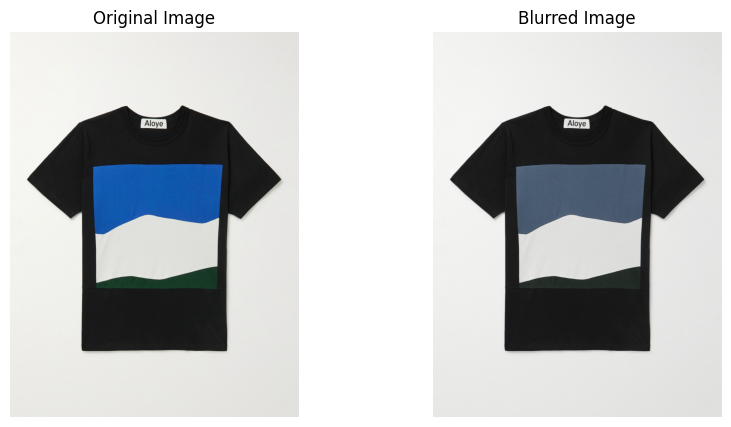

In [85]:
image = cv2.imread('1827.jpg')
blurred_image = apply_gaussian_blur(image)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.title('Blurred Image')
plt.axis('off')

plt.show()

### Step 2: Grayscaling

#### process: 
1. **Kernel Selection**
2. **Convolution Operation** 
#### purpose
 - **friendly to operate**
 - **values 0~255**

In [86]:
def rgb_to_grayscale(image_array):
    luminance = np.dot(image_array[..., :3], [0.299, 0.587, 0.114])
    grayscale_array = luminance.astype(np.uint8)
    return grayscale_array

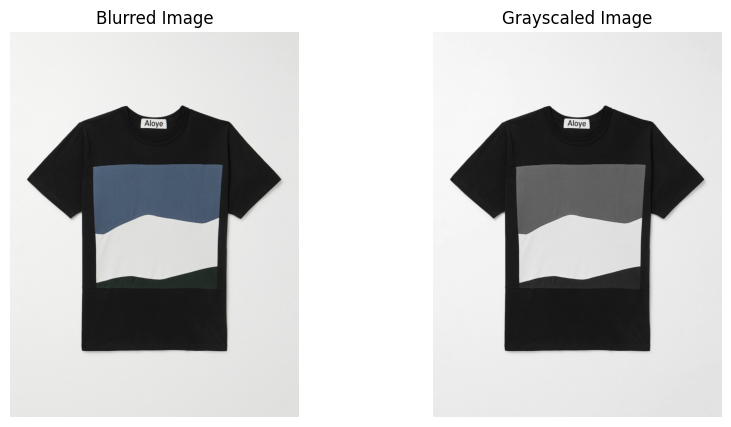

In [87]:
gray_image = rgb_to_grayscale(blurred_image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.title('Blurred Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscaled Image')
plt.axis('off')

plt.show()